In [93]:
import pandas as pd

df = pd.read_csv("/kaggle/input/toxic-comment/train.csv")
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [94]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [95]:
def clean_text(text):
    if not text:
        return ""
    
    text = str(text)
    
    # Remove newlines, tabs, carriage returns, and excessive whitespace
    text = re.sub(r'[\n\r\t\f\v]+', ' ', text)
    
    # Remove extra spaces (multiple spaces become single space)
    text = re.sub(r'\s+', ' ', text)
    
    # Lowercase the text
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove special characters, punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces again after cleaning
    text = re.sub(r'\s+', ' ', text)
    
    # Strip leading and trailing whitespace
    text = text.strip()
    
    # Tokenize and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word and word not in stop_words and len(word) > 1]
    
    return ' '.join(filtered_words)

df['comment_text'] = df['comment_text'].apply(clean_text)
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0
159569,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0


In [96]:
df = df.dropna().drop(['id'], axis=1)
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0
159567,ashamed horrible thing put talk page,0,0,0,0,0,0
159568,spitzer umm theres actual article prostitution...,0,0,0,0,0,0
159569,looks like actually put speedy first version d...,0,0,0,0,0,0


In [107]:
import pandas as pd
import numpy as np

def duplicate_minority_classes(df, target_columns=['identity_hate', 'threat']):
    """Duplicate minority class samples"""
    balanced_df = df.copy()
    
    for col in target_columns:
        minority_samples = df[df[col] == 1]
        
        duplicated = pd.concat([minority_samples] * 3, ignore_index=True)
        
        balanced_df = pd.concat([balanced_df, duplicated], ignore_index=True)
        
        print(f"{col}: Added {len(duplicated)} duplicates")
    
    return balanced_df

balanced_data = duplicate_minority_classes(df)
print(f"Original: {len(df)}, Balanced: {len(balanced_data)}")

identity_hate: Added 4215 duplicates
threat: Added 1434 duplicates
Original: 159571, Balanced: 165220


In [108]:
df = balanced_data

In [109]:
from collections import Counter

def build_vocab(texts, max_vocab=50000):
    counter = Counter()
    for line in texts:
        counter.update(line.split())
    most_common = counter.most_common(max_vocab - 2)
    vocab = {"<PAD>": 0, "<UNK>": 1}
    vocab.update({word: i+2 for i, (word, _) in enumerate(most_common)})
    return vocab

def encode(text, vocab):
    return [vocab.get(w, vocab["<UNK>"]) for w in text.split()]

vocab = build_vocab(df['comment_text'].tolist(), max_vocab=216477)
encoded_texts = [encode(text, vocab) for text in df['comment_text']]

In [110]:
from sklearn.model_selection import train_test_split

y = df.drop(['comment_text'], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(encoded_texts, y, test_size=0.2, random_state=42, stratify=y[:, 0])

In [111]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader

In [112]:
class ToxicDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx], dtype=torch.long), self.labels[idx]

def collate_fn(batch):
    texts, labels = zip(*batch)
    lengths = [len(x) for x in texts]
    padded = pad_sequence(texts, batch_first=True, padding_value=0)
    return padded, torch.stack(labels)

train_ds = ToxicDataset(X_train, y_train)
val_ds = ToxicDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_ds, batch_size=128, shuffle=False, collate_fn=collate_fn)

In [113]:
import torch.nn as nn

class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_labels):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(hidden_dim * 2, 64)
        self.dropout = nn.Dropout(0.3)
        self.out = nn.Linear(64, num_labels)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        _, (h_n, _) = self.lstm(embedded)
        h_cat = torch.cat((h_n[-2], h_n[-1]), dim=1)
        x = self.dropout(torch.relu(self.fc1(h_cat)))
        return self.sigmoid(self.out(x))

In [123]:
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BiLSTMClassifier(vocab_size=len(vocab), embed_dim=256, hidden_dim=128, num_labels=6).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=2, verbose=True, min_lr=1e-6
)

num_epochs = 4
for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_train_loss = 0
    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]", leave=False)

    for batch_x, batch_y in train_loop:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        train_loop.set_postfix(loss=loss.item())

    avg_train_loss = total_train_loss / len(train_loader)

    # Validation phase
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        val_loop = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]", leave=False)
        for batch_x, batch_y in val_loop:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            total_val_loss += loss.item()
            val_loop.set_postfix(val_loss=loss.item())

    avg_val_loss = total_val_loss / len(val_loader)

    scheduler.step(avg_val_loss)
    # Epoch summary
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/4 | Train Loss: 0.1150 | Val Loss: 0.0775


Epoch 2/4 | Train Loss: 0.0667 | Val Loss: 0.0658


Epoch 3/4 | Train Loss: 0.0494 | Val Loss: 0.0595


Epoch 4/4 | Train Loss: 0.0367 | Val Loss: 0.0579


In [124]:
from sklearn.metrics import f1_score, accuracy_score

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch_x, batch_y in val_loader:
        batch_x = batch_x.to(device)
        outputs = model(batch_x).cpu()
        preds = (outputs > 0.5).float()
        all_preds.append(preds)
        all_labels.append(batch_y)

y_pred = torch.cat(all_preds).numpy()
y_true = torch.cat(all_labels).numpy()

print("F1 Score (micro):", f1_score(y_true, y_pred, average='micro'))
print("Accuracy Score: ", accuracy_score(y_true, y_pred))

F1 Score (micro): 0.8178103022239118
Accuracy Score:  0.914265827381673


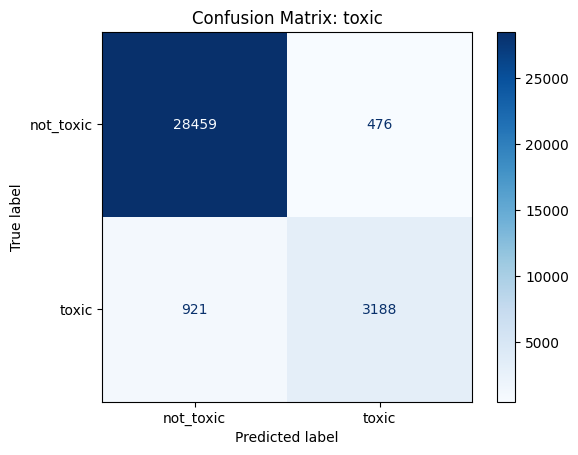

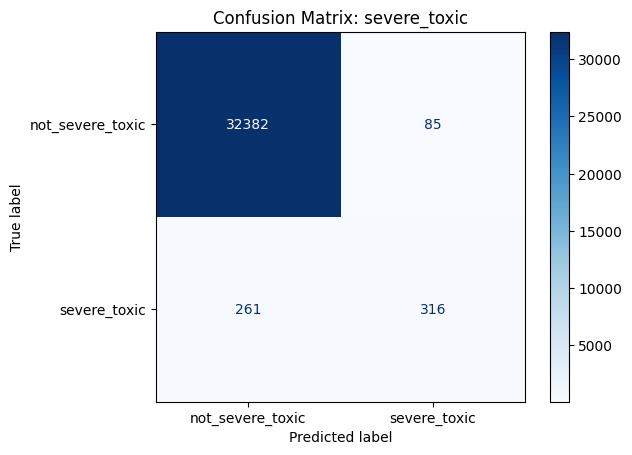

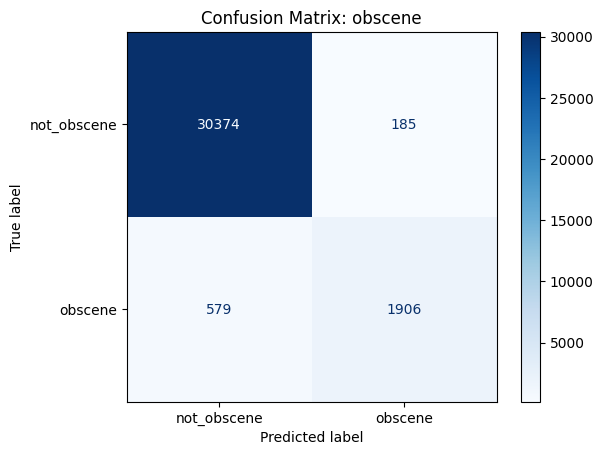

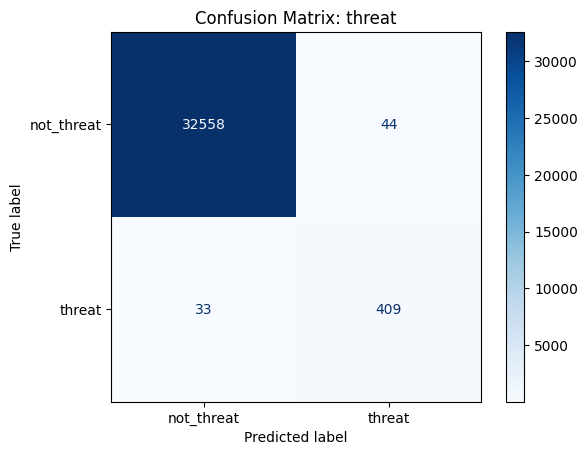

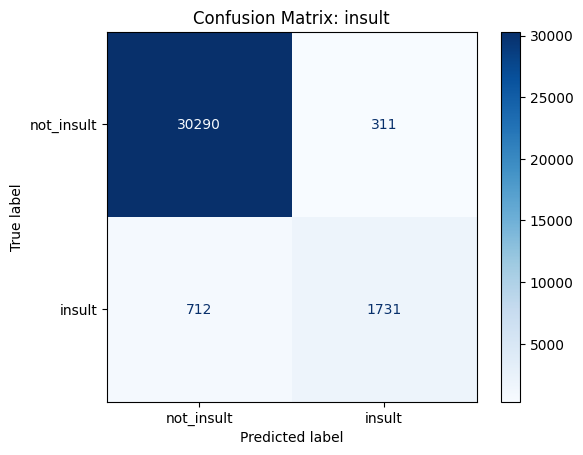

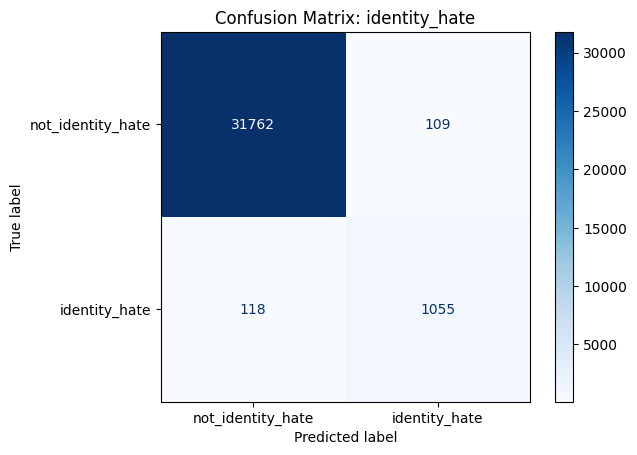

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for i, category in enumerate(categories):
    cm = confusion_matrix(y_true[:, i], y_pred[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'not_{category}', category])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: {category}')
    plt.grid(False)
    plt.show()


In [105]:
def predict(text, threshold=0.5):
    model.eval()
    text = clean_text(text)
    encoded = torch.tensor(encode(text, vocab), dtype=torch.long).unsqueeze(0).to(device)
    with torch.no_grad():
        pred = model(encoded)

    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    probs = pred[0]
    print("Probabilities:", probs.tolist())
    return {label: int(prob >= threshold) for label, prob in zip(labels, probs)}

predict(input("> "))

>  You are dumb


Probabilities: [0.8837065100669861, 0.5426120162010193, 0.7739850878715515, 0.31424158811569214, 0.5864006280899048, 0.3406720757484436]


{'toxic': 1,
 'severe_toxic': 1,
 'obscene': 1,
 'threat': 0,
 'insult': 1,
 'identity_hate': 0}